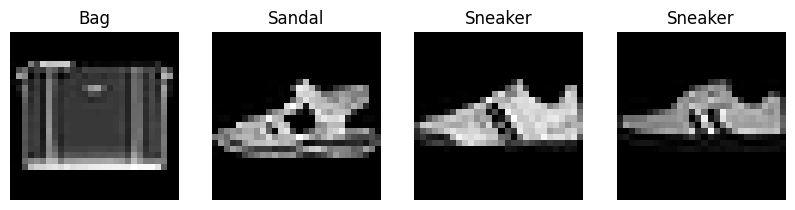

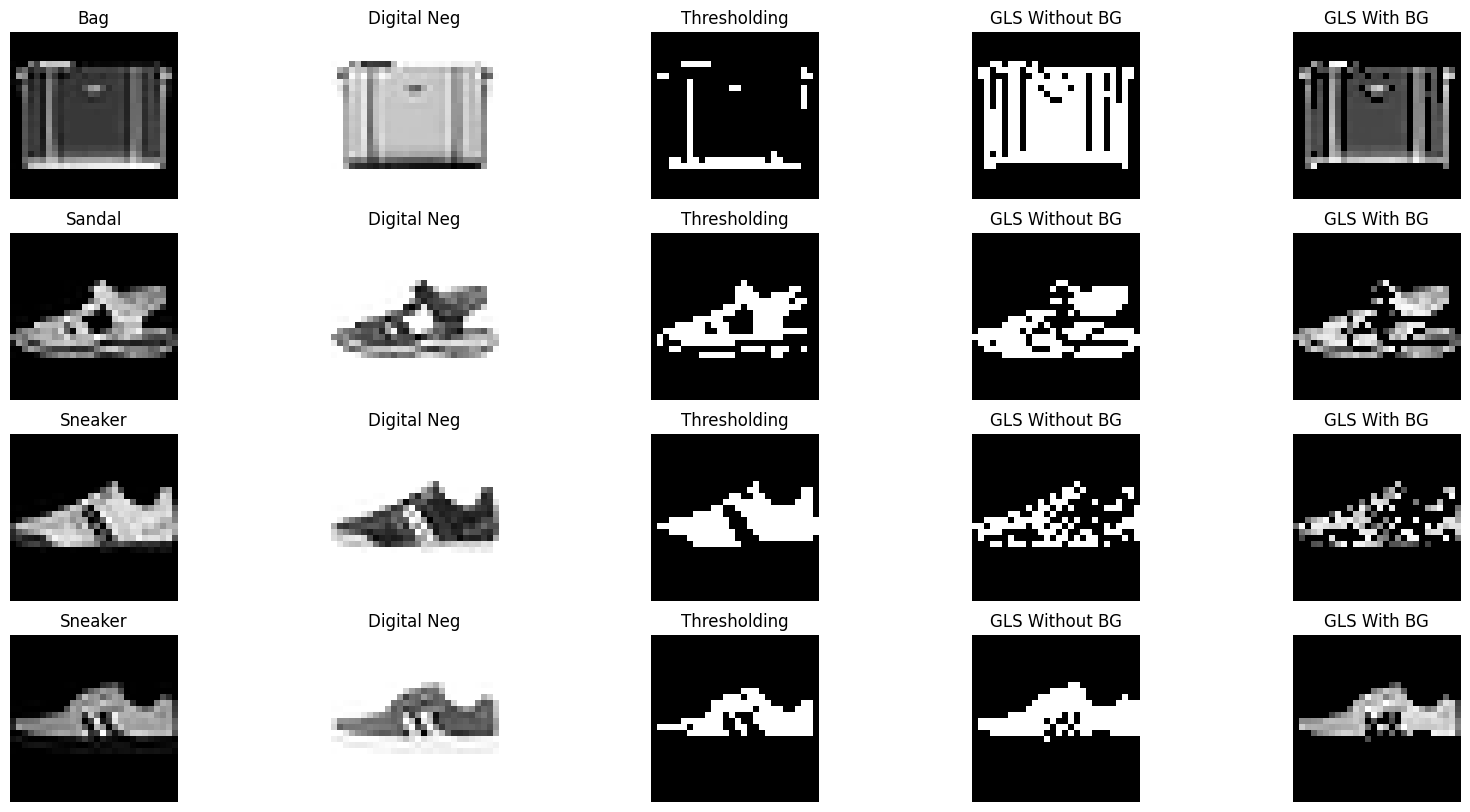

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

class_names = ["Sandal", "Sneaker", "Bag"]
labels_to_display = [5, 7, 8]
df = pd.DataFrame({'image': list(train.iloc[:, 1:].values.reshape(-1, 28, 28)), 'label': train.iloc[:, 0]})
filtered_df = df[df['label'].isin(labels_to_display)]

random_indices = np.random.choice(filtered_df.index, 4, replace=False)
selected_images = [(filtered_df.loc[idx]['image'], class_names[labels_to_display.index(filtered_df.loc[idx]['label'])]) for idx in random_indices]

plt.figure(figsize=(10, 4))
for i, (image, label) in enumerate(selected_images):
    plt.subplot(1, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.show()

def digital_neg(img):
    neg = 255 - img
    return neg

def thresholding(img, threshold=127):
    new_img = np.where(img > threshold, 255, 0)
    return new_img

def gls_without_bg(img, a, b):
    return np.where((img >= a) & (img <= b), 255, 0)

def gls_with_bg(img, a, b):
    return np.where((img >= a) & (img <= b), img, 0)

plt.figure(figsize=(20, 10))

for i, (image, label) in enumerate(selected_images):
    plt.subplot(4, 5, i * 5 + 1)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')

    plt.subplot(4, 5, i * 5 + 2)
    plt.imshow(digital_neg(image), cmap='gray')
    plt.title('Digital Neg')
    plt.axis('off')

    plt.subplot(4, 5, i * 5 + 3)
    plt.imshow(thresholding(image), cmap='gray')
    plt.title('Thresholding')
    plt.axis('off')

    plt.subplot(4, 5, i * 5 + 4)
    plt.imshow(gls_without_bg(image, 50, 200), cmap='gray')
    plt.title('GLS Without BG')
    plt.axis('off')

    plt.subplot(4, 5, i * 5 + 5)
    plt.imshow(gls_with_bg(image, 50, 200), cmap='gray')
    plt.title('GLS With BG')
    plt.axis('off')

plt.show()
